NAMA : ANGGREYNI AYU HAPSARY
NIM : 0110222058

1. **MELOAD DATA DARI KAGGLE **

In [1]:
!pip install kaggle

In [2]:
import pandas as pd
path = pd.read_json('https://drive.google.com/uc?export=download&id=1bZViwm0Il9_dwY-PoDo0BWQSrH32VHRL', orient='index')

In [10]:
kaggle = '/content/kaggle.json'

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.54GB/s]


In [13]:
from zipfile import ZipFile
import os
file_name = '/content/handwritten-digits-0-9.zip'

extract_folder = 'data'
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [16]:
data_0 = os.listdir('/content/data/0')
data_1 = os.listdir('/content/data/1')
data_2 = os.listdir('/content/data/2')
data_3 = os.listdir('/content/data/3')
data_4 = os.listdir('/content/data/4')
data_5 = os.listdir('/content/data/5')
data_6 = os.listdir('/content/data/6')
data_7 = os.listdir('/content/data/7')
data_8 = os.listdir('/content/data/8')
data_9 = os.listdir('/content/data/9')

In [17]:
len(data_0)

2236

In [18]:
!pip3 install tensorflow

In [19]:
!python -c "import tensorflow as tf; print(tf.__version__)"

2025-12-21 07:45:32.122569: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-21 07:45:32.130241: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-21 07:45:32.153314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766303132.175917    4182 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766303132.182088    4182 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766303132.198198    4182 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

1. Import Library

In [20]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

2. Load Dataset

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
# Cek bentuk data nya
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


3. Preprocessing Data (Image → Numeric)

In [23]:
# Normalisasi
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [24]:
# One-Hot Encoding Label
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

Dataset MNIST secara standar sudah dibagi oleh pembuat dataset menjadi:

- Training set: 60.000 citra
- Testing set: 10.000 citra

4. Modeling Menggunakan ANN (MLP)

In [25]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # ubah gambar ke vektor 784
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')    # output 10 kelas
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

5. Training Model

In [28]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7965 - loss: 0.7028 - val_accuracy: 0.9466 - val_loss: 0.1804
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9528 - loss: 0.1604 - val_accuracy: 0.9610 - val_loss: 0.1389
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9679 - loss: 0.1073 - val_accuracy: 0.9696 - val_loss: 0.1079
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.0753 - val_accuracy: 0.9703 - val_loss: 0.1047
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9815 - loss: 0.0625 - val_accuracy: 0.9726 - val_loss: 0.0939
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0486 - val_accuracy: 0.9711 - val_loss: 0.0968
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0386 - val_accuracy: 0.9737 - val_loss: 0.0952
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0319 - val_accuracy: 0.

6. Evaluasi Model

In [29]:
# Evaluasi pada data test
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9745000004768372


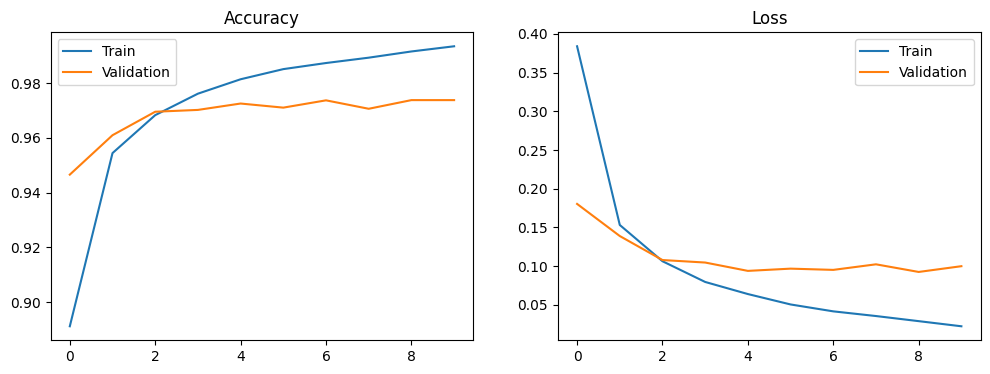

In [30]:
# Visualisasi Akurasi & Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

7. Prediksi Contoh Data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


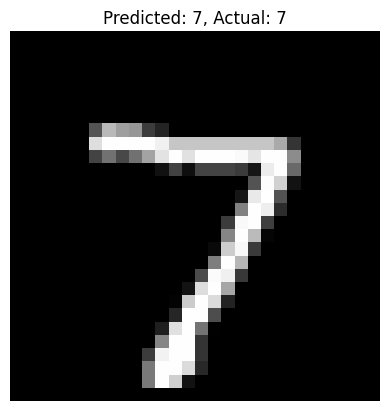

In [33]:
pred = model.predict(X_test)

plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {py.argmax(pred[0])}, Actual: {y_test[0]}")
plt.axis('off')
plt.show()